In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
from __future__ import print_function 
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, Layout, VBox
import ipywidgets as widgets

from tkinter import *

# Mean by month

In [3]:
daily = pd.read_excel('daily all.xlsx')
del daily['Unnamed: 0']

In [4]:
meanby = ['Mean by Day PST','Mean by Day CO','Mean by Day NO2','Mean by Day NO','Mean by Day SO2','Mean by Day O3']
def information(start_date,end_date,place, Particle = meanby):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    daily['FECHA_HI'] = pd.to_datetime(daily['FECHA_HI'])
    stat_df = daily.loc[(daily['FECHA_HI']>=start_date)&(daily['FECHA_HI']<=end_date)]
    
    x = stat_df[stat_df['Place'].isin(place)]
    x = x[['FECHA_HI','Month','Day','DayWeek','Year','Place',Particle]]
        
    x_monthyear = x.groupby(['Month','Year'],as_index = False).mean()
    x_monthyear2015 = x_monthyear[x_monthyear['Year']==2015]
    x_monthyear2016 = x_monthyear[x_monthyear['Year']==2016]
    x_monthyear2017 = x_monthyear[x_monthyear['Year']==2017]
    x_monthyear2018 = x_monthyear[x_monthyear['Year']==2018]
    
    timeline = [1,2,3,4,5,6,7,8,9,10,11,12]
    y1 = x_monthyear2015[Particle]
    plt.plot(timeline, y1, label = "Year 2015")

    # line 2 points
    y2 = x_monthyear2016[Particle]
    # plotting the line 2 points 
    plt.plot(timeline, y2, label = "Year 2016")
    
    # line 3 points
    y3 = x_monthyear2017[Particle]
    # plotting the line 2 points 
    plt.plot(timeline, y3, label = "Year 2017")
    
    # line 4 points
    y4 = x_monthyear2018[Particle]
    # plotting the line 2 points 
    plt.plot(timeline, y4, label = "Year 2018")

    # naming the x axis
    plt.xlabel('Month')
    # naming the y axis
    plt.ylabel('Particle level')
    # giving a title to my graph
    plt.title('Mean level particle by month')

    # show a legend on the plot
    plt.legend()
    # function to show the plot
    plt.show()
    
    
    

interactive(children=(DatePicker(value=Timestamp('2015-01-01 00:00:00'), description='start_date'), DatePicker…

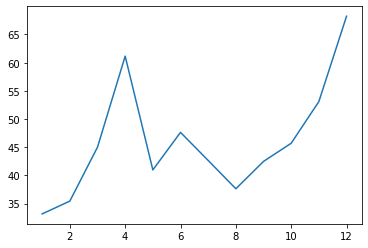

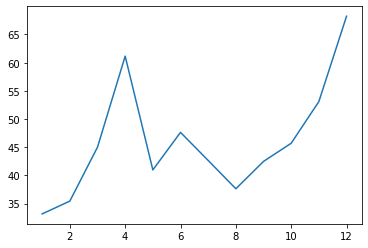

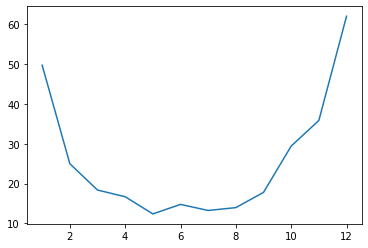

In [5]:
graphs = interact_manual(information,
                        start_date = widgets.DatePicker(value=pd.to_datetime('2015-01-01')),
                        end_date = widgets.DatePicker(value=pd.to_datetime('2018-12-31')),
                        place = widgets.SelectMultiple(options = daily.Place.sort_values().unique(),description = 'Place',disabled = False))

### Comparando estaciones

In [6]:
daily = pd.read_excel('daily all.xlsx')
del daily['Unnamed: 0']

In [7]:
meanby = ['Mean by Day PST','Mean by Day CO','Mean by Day NO2','Mean by Day NO','Mean by Day SO2','Mean by Day O3']
def information(place,Years, Particle = meanby):

    
    daily['FECHA_HI'] = pd.to_datetime(daily['FECHA_HI'])
    
    x = daily[daily['Place'].isin(place)]
    x = x[x['Year'].isin(Years)]
    x = x[['FECHA_HI','Month','Day','DayWeek','Year','Place',Particle]]    
    
        
    x_monthyear = x.groupby(['Month','Year','Place'],as_index = False).mean()
    
    sns.barplot(x='Month',y=Particle,data=x_monthyear,hue='Place')
    figure(figsize=(108,106), dpi=80)

    
    
    
    
graphs = interact_manual(information,
                        place = widgets.SelectMultiple(options = daily.Place.sort_values().unique(),description = 'Place',disabled = False),
                        Years = widgets.SelectMultiple(options = daily.Year.sort_values().unique(),description = 'Year',disabled = False))

interactive(children=(SelectMultiple(description='Place', options=('Av Constitución Gijón', 'Avilés Matadero',…

# Mean by DayWeek

In [8]:
daily = pd.read_excel('daily all.xlsx')
del daily['Unnamed: 0']

In [9]:
meanby = ['Mean by Day PST','Mean by Day CO','Mean by Day NO2','Mean by Day NO','Mean by Day SO2','Mean by Day O3']
def information(start_date,end_date,place, Particle = meanby):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    daily['FECHA_HI'] = pd.to_datetime(daily['FECHA_HI'])
    stat_df = daily.loc[(daily['FECHA_HI']>=start_date)&(daily['FECHA_HI']<=end_date)]
    
    x = stat_df[stat_df['Place'].isin(place)]
    x = x[['FECHA_HI','Month','Day','DayWeek','Year','Place',Particle]]
        
    x_dayweekyear = x.groupby(['DayWeek','Year'],as_index = False).mean()
    
    x_dayweekyear2015 = x_dayweekyear[x_dayweekyear['Year']==2015]
    x_dayweekyear2016 = x_dayweekyear[x_dayweekyear['Year']==2016]
    x_dayweekyear2017 = x_dayweekyear[x_dayweekyear['Year']==2017]
    x_dayweekyear2018 = x_dayweekyear[x_dayweekyear['Year']==2018]
    
    timeline = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    y1 = x_dayweekyear2015[Particle]
    plt.plot(timeline, y1, label = "Year2015")

    # line 2 points
    y2 = x_dayweekyear2016[Particle]
    # plotting the line 2 points 
    plt.plot(timeline, y2, label = "Year 2016")
    
    # line 3 points
    y3 = x_dayweekyear2017[Particle]
    # plotting the line 2 points 
    plt.plot(timeline, y3, label = "Year 2017")
    
    # line 4 points
    y4 = x_dayweekyear2018[Particle]
    # plotting the line 2 points 
    plt.plot(timeline, y4, label = "Year 2018")
    


    # naming the x axis
    plt.xlabel('Month')
    # naming the y axis
    plt.ylabel('Particle level')
    # giving a title to my graph
    plt.title('Mean level particle by month')

    # show a legend on the plot
    plt.legend()
    # function to show the plot
    plt.show()    

In [10]:
graphs = interact_manual(information,
                        start_date = widgets.DatePicker(value=pd.to_datetime('2015-01-01')),
                        end_date = widgets.DatePicker(value=pd.to_datetime('2018-12-31')),
                        place = widgets.SelectMultiple(options = daily.Place.sort_values().unique(),description = 'Place',disabled = False))

interactive(children=(DatePicker(value=Timestamp('2015-01-01 00:00:00'), description='start_date'), DatePicker…

### Comparando estaciones

In [11]:
daily = pd.read_excel('daily all.xlsx')
del daily['Unnamed: 0']

In [12]:
meanby = ['Mean by Day PST','Mean by Day CO','Mean by Day NO2','Mean by Day NO','Mean by Day SO2','Mean by Day O3']
def information(place,Years, Particle = meanby):

    
    daily['FECHA_HI'] = pd.to_datetime(daily['FECHA_HI'])
    
    x = daily[daily['Place'].isin(place)]
    x = x[x['Year'].isin(Years)]
    x = x[['FECHA_HI','Month','Day','DayWeek','Year','Place',Particle]]    
    
        
    x_monthyear = x.groupby(['DayWeek','Year','Place'],as_index = False).mean()
    timeline = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    
    sns.barplot(x='DayWeek',y=Particle,data=x_monthyear,hue='Place',order = timeline)
    figure(figsize=(108,106), dpi=80)

    
    
    
    
graphs = interact_manual(information,
                        place = widgets.SelectMultiple(options = daily.Place.sort_values().unique(),description = 'Place',disabled = False),
                        Years = widgets.SelectMultiple(options = daily.Year.sort_values().unique(),description = 'Year',disabled = False))

interactive(children=(SelectMultiple(description='Place', options=('Av Constitución Gijón', 'Avilés Matadero',…

# Mean by hours

In [13]:
hourly = pd.read_excel('hourly all.xlsx')
del hourly['Unnamed: 0']
hourly

,Hour,Mean by Hour PST,Mean by Hour CO,Mean by Hour NO2,Mean by Hour NO,Mean by Hour SO2,Year,Place,Mean by Hour O3
0,1,23.89,0.34,16.34,8.80,8.22,2015,Avilés Matadero,NaN
1,2,23.95,0.34,15.27,7.49,7.75,2015,Avilés Matadero,NaN
2,3,23.23,0.33,15.61,7.37,7.85,2015,Avilés Matadero,NaN
3,4,23.17,0.34,17.64,10.07,7.47,2015,Avilés Matadero,NaN
4,5,25.89,0.33,23.41,19.32,7.76,2015,Avilés Matadero,NaN
...,...,...,...,...,...,...,...,...,...
955,20,21.30,NaN,21.06,12.48,4.56,2018,Llaranes Avilés,39.06
956,21,20.36,NaN,20.66,13.44,4.52,2018,Llaranes Avilés,36.86
957,22,20.20,NaN,17.51,11.83,4.40,2018,Llaranes Avilés,37.15
958,23,19.17,NaN,13.98,9.13,4.16,2018,Llaranes Avilés,36.95


In [14]:
meanby = ['Mean by Hour PST','Mean by Hour CO','Mean by Hour NO2','Mean by Hour NO','Mean by Hour SO2','Mean by Hour O3']
def information(place, Particle = meanby):
    
    
    x = hourly[hourly['Place'].isin(place)]
    x = x[['Hour','Year','Place',Particle]]
        
    x_houryear = x.groupby(['Hour','Year'],as_index = False).mean()
    x_houryear2015 = x_houryear[x_houryear['Year']==2015]
    x_houryear2016 = x_houryear[x_houryear['Year']==2016]
    x_houryear2017 = x_houryear[x_houryear['Year']==2017]
    x_houryear2018 = x_houryear[x_houryear['Year']==2018]
    
    timeline = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    y1 = x_houryear2015[Particle]
    plt.plot(timeline, y1, label = "Year 2015")

    # line 2 points
    y2 = x_houryear2016[Particle]
    # plotting the line 2 points 
    plt.plot(timeline, y2, label = "Year 2016")
    
    # line 3 points
    y3 = x_houryear2017[Particle]
    # plotting the line 2 points 
    plt.plot(timeline, y3, label = "Year 2017")
    
    # line 4 points
    y4 = x_houryear2018[Particle]
    # plotting the line 2 points 
    plt.plot(timeline, y4, label = "Year 2018")

    # naming the x axis
    plt.xlabel('Hour')
    # naming the y axis
    plt.ylabel('Particle level')
    # giving a title to my graph
    plt.title('Mean level particle by hour')

    # show a legend on the plot
    plt.legend()
    # function to show the plot
    plt.show()

    
graphs = interact_manual(information, place = widgets.SelectMultiple(options = hourly.Place.sort_values().unique(),description = 'Place',disabled = False))

interactive(children=(SelectMultiple(description='Place', options=('Av Constitución Gijón', 'Avilés Matadero',…

### Bibliography

https://scied.ucar.edu/learning-zone/air-quality/ozone-troposphere#:~:text=Typically%2C%20ozone%20levels%20reach%20their,the%20production%20of%20ozone%20pollution.

https://uihc.org/health-library/carbon-monoxide#:~:text=Carbon%20monoxide%20is%20produced%20by,been%20installed%20without%20proper%20ventilation.

### Comparando estaciones

In [15]:
hourly = pd.read_excel('hourly all.xlsx')
del hourly['Unnamed: 0']

meanby = ['Mean by Hour PST','Mean by Hour CO','Mean by Hour NO2','Mean by Hour NO','Mean by Hour SO2','Mean by Hour O3']
def information(place,Years, Particle = meanby):

        
    x = hourly[hourly['Place'].isin(place)]
    x = x[x['Year'].isin(Years)]
    x = x[['Hour','Year','Place',Particle]]    
    
        
    x_houryear = x.groupby(['Hour','Year','Place'],as_index = False).mean()
    timeline = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

    sns.barplot(x='Hour',y=Particle,data=x_houryear,hue='Place',order = timeline).set_title("Mean by hour from year: "+str(Years[0]))
    figure(figsize=(108,106), dpi=80)

    
    
    
    
graphs = interact_manual(information,
                        place = widgets.SelectMultiple(options = daily.Place.sort_values().unique(),description = 'Place',disabled = False),
                        Years = widgets.SelectMultiple(options = daily.Year.sort_values().unique(),description = 'Year',disabled = False))

interactive(children=(SelectMultiple(description='Place', options=('Av Constitución Gijón', 'Avilés Matadero',…